In [1]:
# Todo: find out what this does
# %reload_ext autoreload
# %autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sys, os
root_path = '/chalmers/sw/unsup64/root-6.26.10/lib'
sys.path.append(root_path)
from frisch import Chamber
from func_lib import load_root_libraries, load_garfield, plot_chambers

# Suppress all text output
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

load_root_libraries()
load_garfield()

Welcome to JupyROOT 6.26/10


### He4 5.4MeV vs Be 40 800MeV

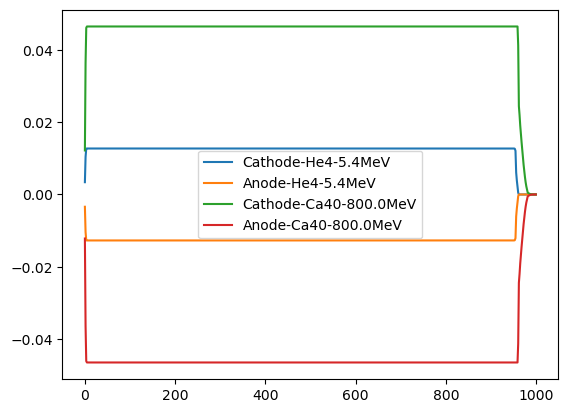

In [3]:
chamber1 = Chamber(
    "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt",
    use_frisch=False,
)
chamber2 = Chamber(
    "../DataFiles/EXYZ_Be8-20.0MeV_2023-04-04_1357.txt",
    use_frisch=False,
)

fig, ax = plt.subplots()
# t_min_plot, t_max_plot = 940, 970
t_min_plot, t_max_plot = 0, 1000
chamber1.run()
data = chamber1.get_signals()
print(data["times"][-1])
i_min = int(len(data["times"])*t_min_plot/(data["times"][-1]-data["times"][0]))
i_max = int(len(data["times"])*t_max_plot/(data["times"][-1]-data["times"][0]))
ax.plot(data["times"][i_min:i_max], data["signals"]["Cathode"][i_min:i_max], label="Cathode-He4-5.4MeV")
ax.plot(data["times"][i_min:i_max], data["signals"]["Anode"][i_min:i_max], label="Anode-He4-5.4MeV")


# ax.plot(data["times"], data["signals"]["Cathode"], label="Cathode-He4-5.4MeV")
# ax.plot(data["times"], data["signals"]["Anode"], label="Anode-He4-5.4MeV")

chamber2.run()
data = chamber2.get_signals()

ax.plot(data["times"][i_min:i_max], data["signals"]["Cathode"][i_min:i_max], label="Cathode-Ca40-800.0MeV")
ax.plot(data["times"][i_min:i_max], data["signals"]["Anode"][i_min:i_max], label="Anode-Ca40-800.0MeV")
# ax.plot(data["times"], data["signals"]["Cathode"], label="Cathode-Ca40-800.0MeV")
# ax.plot(data["times"], data["signals"]["Anode"], label="Anode-Ca40-800.0MeV")

ax.legend()
plt.show()

##### Verify that the current is the same with different energy intervals in SRIM file

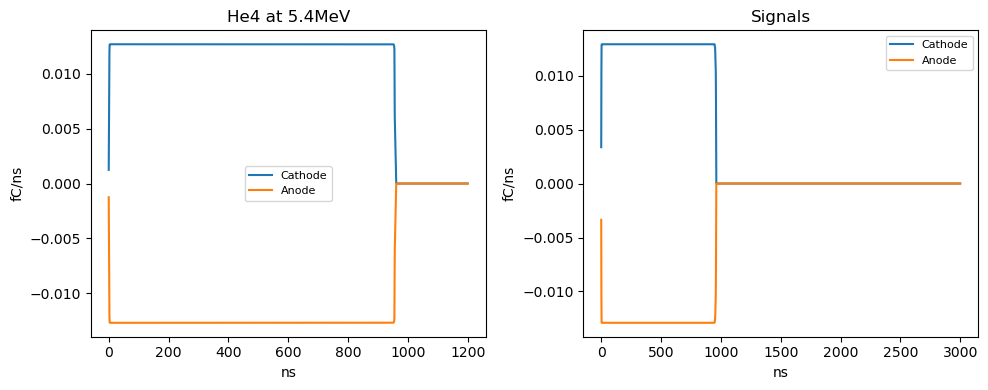

In [5]:
EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt" # energy interval 1 keV
label = "He4 at 5.4MeV"
chamber1 = Chamber(
    EXYZ_FILE,
    use_frisch=False,
    label=label,
    t_min=0,
    t_max=1200,
)
EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-26_1144.txt" # energy interval 10 keV
chamber2 = Chamber(
    EXYZ_FILE,
    use_frisch=False,
)
plot_chambers(chamber1, chamber2)


#### Closer look at signal

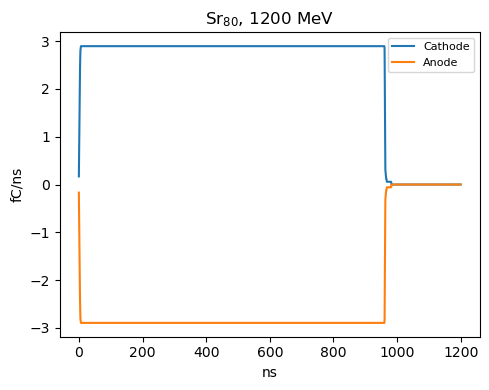

In [18]:
# EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt"
EXYZ_FILE = "../DataFiles/EXYZ_Sr80-1200.0MeV_2023-04-27_1454.txt"
# label = "He4 at 5.4MeV"
label = "Sr$_{80}$, 1200 MeV"
chamber1 = Chamber(
    EXYZ_FILE,
    use_frisch=False,
    label=label,
    t_min=0,
    t_max=1200,
)
# plot_chambers(chamber1, t_min_plot=940, t_max_plot=970)
plot_chambers(chamber1)

#### Simple Frisch grid

#### nice settings, small cross talk

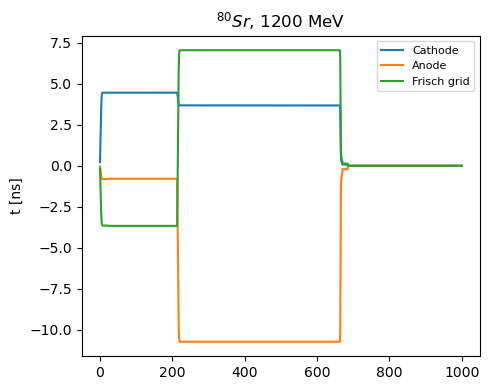

In [2]:
# EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt"
EXYZ_FILE = "../DataFiles/EXYZ_Sr80-1200.0MeV_2023-04-27_1454.txt"
label = "$^{80}Sr$, 1200 MeV"
distance_between_plates = 6.91
distance_anode_to_frisch = 1
chamber1 = Chamber(
    EXYZ_FILE,
    use_frisch=True,
    # use_frisch=False,
    # num_wires=248,
    num_wires=495,
    # chamber_half_size=25,
    chamber_half_size=50,
    distance_between_plates=distance_between_plates,
    # grid2anode_ratio=(distance_between_plates - distance_anode_to_frisch) / distance_anode_to_frisch,
    grid2anode_ratio=5.91 / 6.91,
    label=label,
    t_min=0,
    t_max=1000,
)
# plot_chambers(chamber1, t_min_plot=0, t_max_plot=180)
plot_chambers(chamber1)

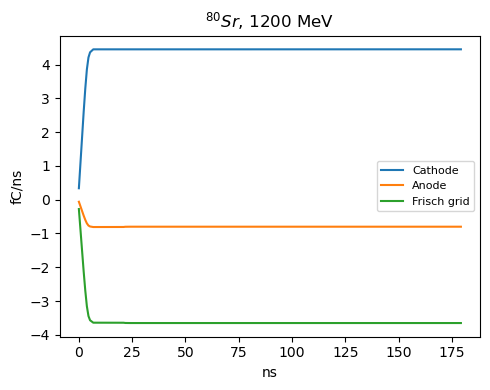

In [3]:
# EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt"
EXYZ_FILE = "../DataFiles/EXYZ_Sr80-1200.0MeV_2023-04-27_1454.txt"
label = "$^{80}Sr$, 1200 MeV"
distance_between_plates = 6.91
distance_anode_to_frisch = 1
chamber1 = Chamber(
    EXYZ_FILE,
    use_frisch=True,
    # use_frisch=False,
    num_wires=792,
    chamber_half_size=80,
    distance_between_plates=distance_between_plates,
    # grid2anode_ratio=(distance_between_plates - distance_anode_to_frisch) / distance_anode_to_frisch,
    grid2anode_ratio=5.91 / 6.91,
    label=label,
    t_min=0,
    t_max=1500,
)
plot_chambers(chamber1, t_min_plot=0, t_max_plot=180)
# plot_chambers(chamber1, t_min_plot=640, t_max_plot=680)
# plot_chambers(chamber1)

#### The current plot in the report

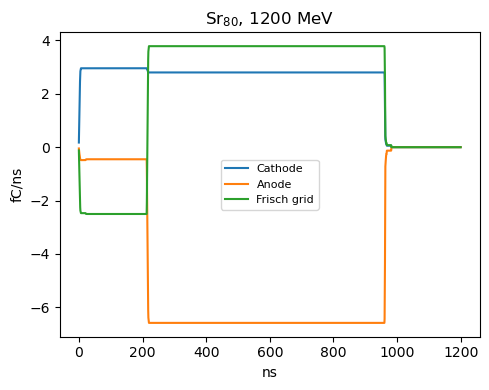

In [19]:
EXYZ_FILE = "../DataFiles/EXYZ_Sr80-1200.0MeV_2023-04-27_1454.txt"
chamber1 = Chamber(
    EXYZ_FILE,
    use_frisch=True,
    num_wires=500,
    label="Sr$_{80}$, 1200 MeV",
    t_min=0,
    t_max=1200,
)
# plot_chambers(chamber1, t_min_plot=940, t_max_plot=970)
plot_chambers(chamber1)

#### He4 5.4MeV with varying number of wires

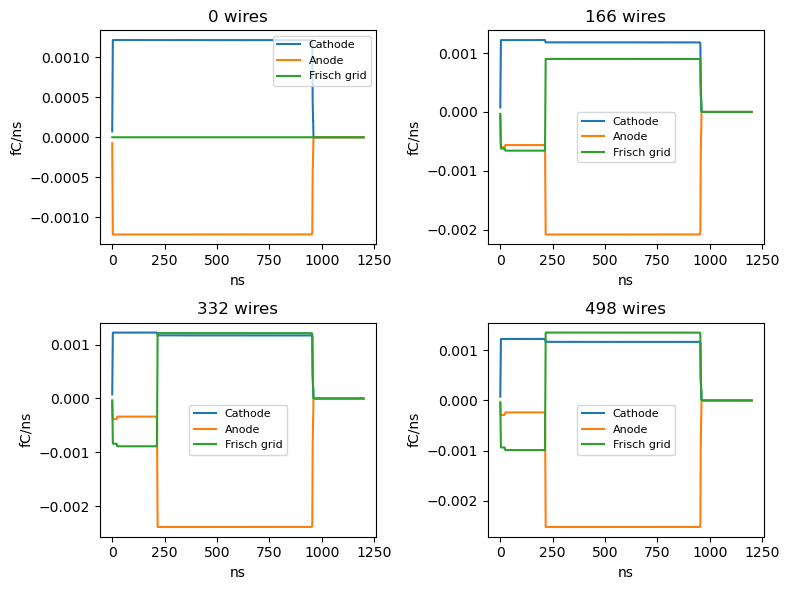

In [7]:
EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt"

# chamber1 = Chamber(EXYZ_FILE, use_frisch=False, num_wires=50)
max_num_wires = 500
num_plots = 4
step = max_num_wires // (num_plots - 1)
chambers = [
    Chamber(
        EXYZ_FILE,
        use_frisch=True,
        num_wires=num_wires,
        t_max=1200,
        # t_max=250,
        row_step=10,
        label=f"{num_wires} wires",
        grid2anode_ratio=0.95,
        
    )
    for num_wires in range(0, max_num_wires + 1, step)
]
plot_chambers(*chambers, width=4, height=3, max_cols=3)


#### Varying voltages

#### Strange behaviour in particle physics on the faculty of subatomic physics at Chalmers University of Technology

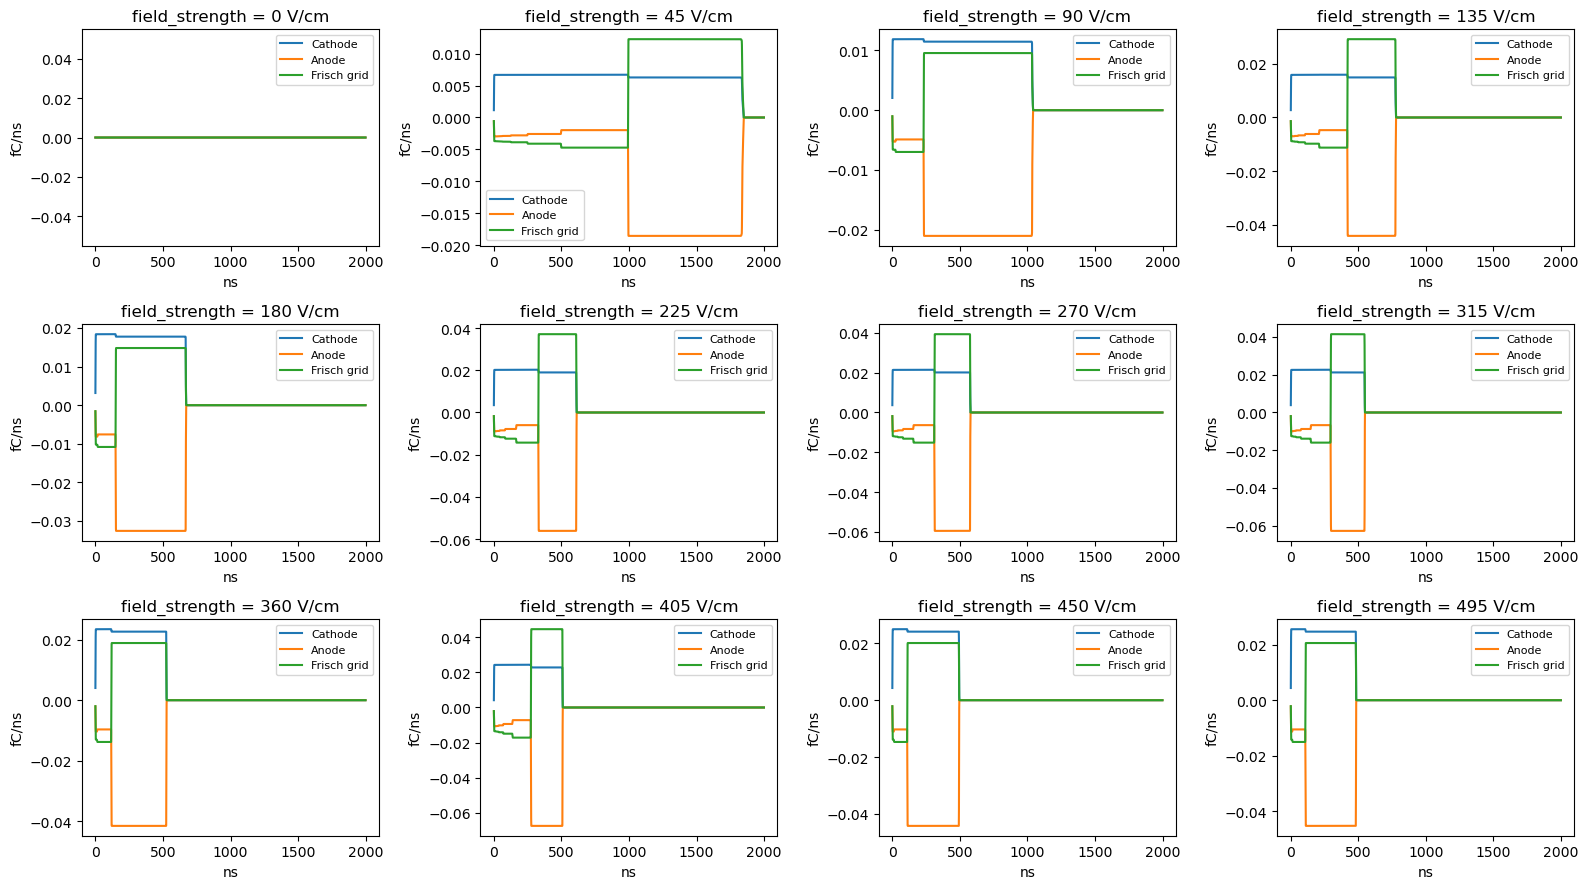

In [10]:
EXYZ_FILE = "../DataFiles/EXYZ_He4-5.4MeV_2023-04-03_1113.txt"

# chamber1 = Chamber(EXYZ_FILE, use_frisch=False, num_wires=50)
max_field_strength = 500
num_plots = 12
step = max_field_strength // (num_plots - 1)
chambers = [
    Chamber(
        EXYZ_FILE,
        use_frisch=True,
        num_wires=200,
        field_strength = field_strength,
        t_max=2000,
        # t_max=250,
        row_step=1,
        label=f"{field_strength = } V/cm",
        grid2anode_ratio=0.95,
        
    )
    for field_strength in range(0, max_field_strength + 1, step)
]
plot_chambers(*chambers, width=4, height=3, max_cols=6)